## How do the eigenvalues depend on simulations

In [84]:
# load modules 
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid, generate_grid_ds
from xhistogram.xarray import histogram

In [2]:
Lcoarse = 50e3

In [3]:
Model_Tav = xr.open_dataset('./outputs_ncfiles/Model_Tav.nc')
Trac_Tav = xr.open_dataset('./outputs_ncfiles/Trac_Tav.nc')

In [4]:
grid = Grid(Model_Tav, periodic='X') 

In [5]:
diff_tensor = xr.open_dataset('./outputs_ncfiles/diff_tensor_'+str(int(Lcoarse//1e3))+'km.nc')
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km.nc')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km.nc')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km.nc')

In [6]:
mixing_scales_coarse = xr.open_dataset('./outputs_ncfiles/mixing_scales_coarse_'+str(int(Lcoarse//1e3))+'km.nc')

In [7]:
list_trac = ['TRAC01', 'TRAC02', 'TRAC03', 'TRAC04', 'TRAC05', 
            'TRAC06', 'TRAC07', 'TRAC08', 'TRAC09', 'TRAC10', 
            'TRAC11', 'TRAC12', 'TRAC13', 'TRAC14', 'TRAC15', 
            'TRAC16', 'TRAC17', 'TRAC18', 'TRAC19', 'TRAC20']

In [26]:
D3 = diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).isel(ii=0)
D2 = diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).isel(ii=1).rename('D2')
D1 = diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).isel(ii=2)

In [88]:
EKE = 0.5*(Vels_coarse.UpUp + Vels_coarse.VpVp).rename('EKE')

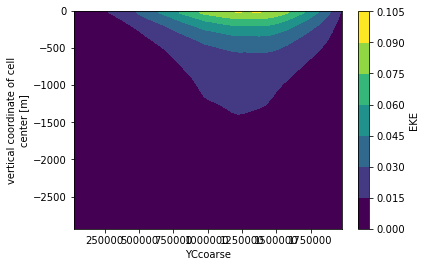

In [92]:
EKE.mean('XCcoarse').plot.contourf()

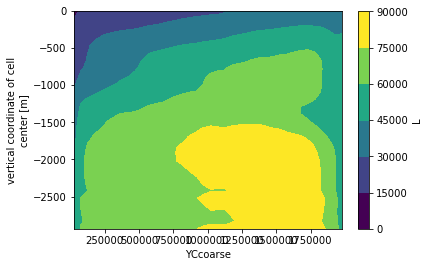

In [91]:
mixing_scales_coarse.L.mean('XCcoarse').plot.contourf()

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


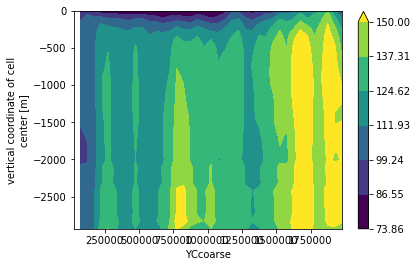

In [167]:
(mixing_scales_coarse.Tu+mixing_scales_coarse.Tv).where(EKE.hFacCcoarse==1.).mean('XCcoarse').plot.contourf(vmax=150)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


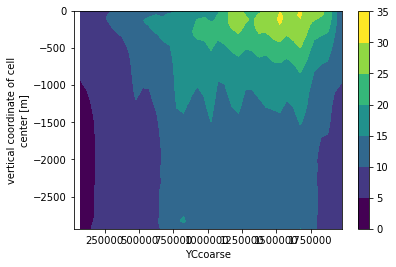

In [169]:
((EKE**0.5)*(mixing_scales_coarse.Tu+mixing_scales_coarse.Tv)).where(EKE.hFacCcoarse==1.).mean('XCcoarse').plot.contourf()

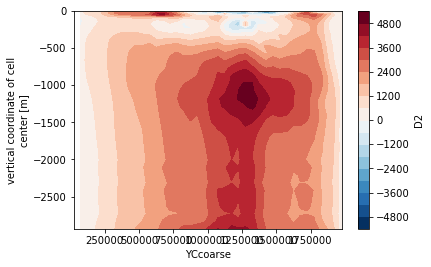

In [133]:
D2.mean('XCcoarse').plot.contourf(levels=21)

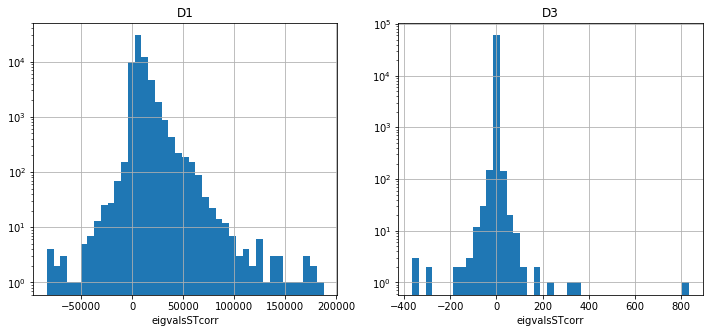

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(121)
[_,_,_] = D1.plot.hist(bins=41)
plt.title('D1')
plt.yscale('log')
plt.grid()

plt.subplot(122)
[_,_,_] = D3.plot.hist(bins=41)
plt.yscale('log')
plt.title('D3')
plt.grid()

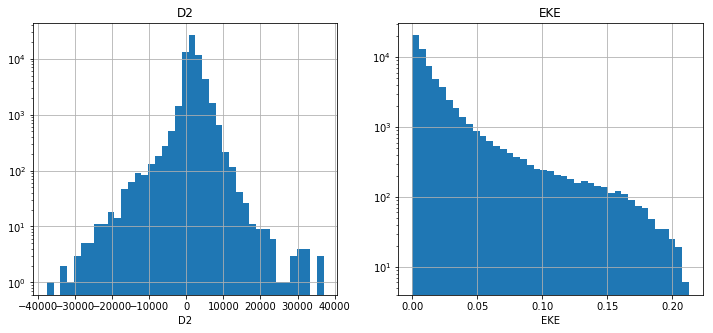

In [71]:
plt.figure(figsize=(12,5))
plt.subplot(121)
[_,_,_] = D2.plot.hist(bins=41)
plt.title('D2')
plt.yscale('log')
plt.grid()

plt.subplot(122)
[_,_,_] = EKE.plot.hist(bins=41)
plt.yscale('log')
plt.title('EKE')
plt.grid()

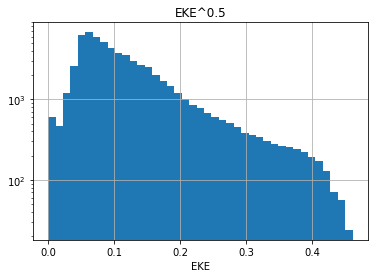

In [85]:
[_,_,_] = (EKE**0.5).plot.hist(bins=41)
plt.yscale('log')
plt.title('EKE^0.5')
plt.grid()

In [74]:
EKEbins  = np.linspace(0, 0.2, 101)
D2bins = np.linspace(-15e3, 15e3,101)
EKEsqrtbins = np.linspace(0, 0.4, 101)

In [76]:
h_EKE_vs_D2 = histogram(EKE.sel(YCcoarse=slice(0,1700e3)), D2.sel(YCcoarse=slice(0,1700e3)), bins=[EKEbins, D2bins])
h_EKEsqrt_vs_D2 = histogram(EKE.sel(YCcoarse=slice(0,1700e3))**0.5, D2.sel(YCcoarse=slice(0,1700e3)), 
                             bins=[EKEsqrtbins, D2bins])

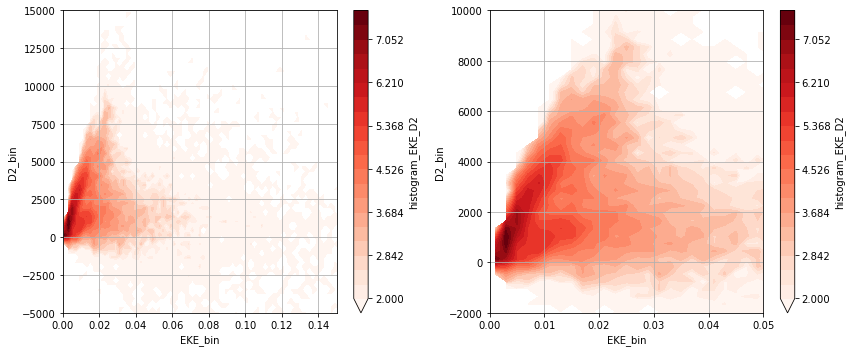

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(121)
np.log(h_EKE_vs_D2).T.plot.contourf(vmin=2, levels=21, cmap='Reds')
plt.grid()
plt.ylim([-5e3, 15e3])
plt.xlim([0, 0.15])

plt.subplot(122)
np.log(h_EKE_vs_D2).T.plot.contourf(vmin=2, levels=21, cmap='Reds')
plt.grid()
plt.ylim([-2e3, 10e3])
plt.xlim([0, 0.05])

plt.tight_layout()

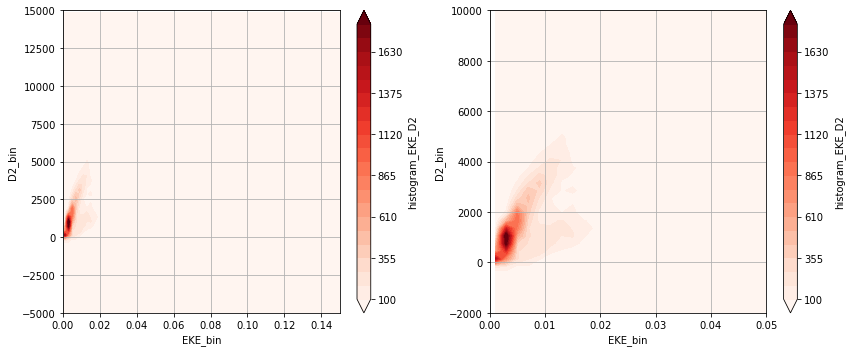

In [66]:
plt.figure(figsize=(12,5))
plt.subplot(121)
(h_EKE_vs_D2).T.plot.contourf(vmin=100, vmax=1800, levels=21, cmap='Reds')
plt.grid()
plt.ylim([-5e3, 15e3])
plt.xlim([0, 0.15])

plt.subplot(122)
(h_EKE_vs_D2).T.plot.contourf(vmin=100, vmax=1800, levels=21, cmap='Reds')

plt.grid()
plt.ylim([-2e3, 10e3])
plt.xlim([0, 0.05])

plt.tight_layout()

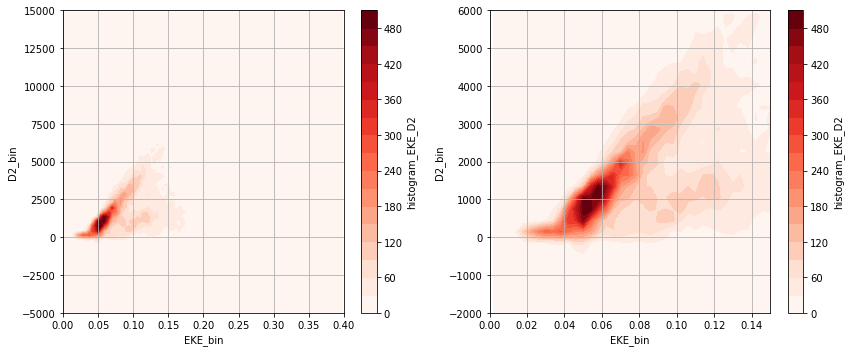

In [82]:
plt.figure(figsize=(12,5))
plt.subplot(121)
(h_EKEsqrt_vs_D2).T.plot.contourf(levels=21, cmap='Reds')
plt.grid()
plt.ylim([-5e3, 15e3])
plt.xlim([0, 0.4])

plt.subplot(122)
(h_EKEsqrt_vs_D2).T.plot.contourf(levels=21, cmap='Reds')

plt.grid()
plt.ylim([-2e3, 6e3])
plt.xlim([0, 0.15])

plt.tight_layout()

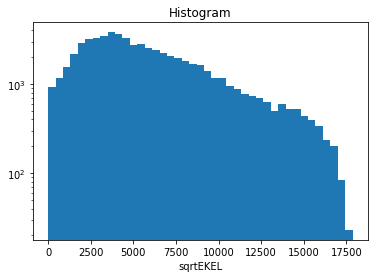

In [107]:
sqrtEKEL = ((mixing_scales_coarse.L)*(EKE**0.5)).rename('sqrtEKEL')
sqrtEKEL.plot.hist(bins=41)
plt.yscale('log')

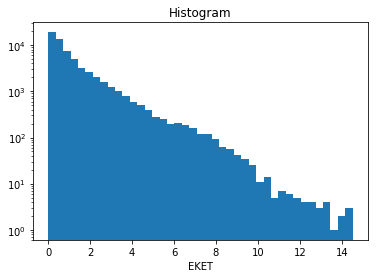

In [157]:
EKETscale = (0.5*(mixing_scales_coarse.Tu + mixing_scales_coarse.Tv)*(EKE)).where(EKE.hFacCcoarse==1).rename('EKET')
EKETscale.plot.hist(bins=41)
plt.yscale('log')

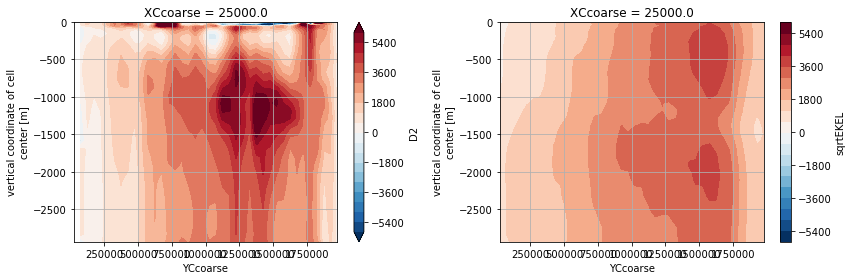

In [149]:
levels = np.linspace(-6000, 6000,21)

plt.figure(figsize=(12,4))

plt.subplot(121)
D2.sel(XCcoarse=0, method='nearest').plot.contourf(levels=levels, cmap='RdBu_r')
plt.grid()

plt.subplot(122)
(0.36*sqrtEKEL).sel(XCcoarse=0, method='nearest').plot.contourf(levels=levels, cmap='RdBu_r')
plt.grid()

plt.tight_layout()

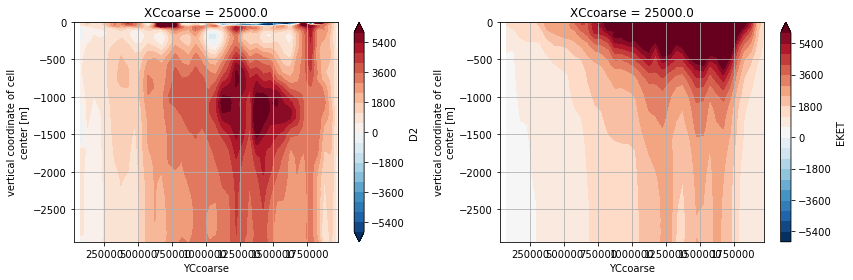

In [161]:
levels = np.linspace(-6000, 6000,21)

plt.figure(figsize=(12,4))

plt.subplot(121)
D2.sel(XCcoarse=0, method='nearest').plot.contourf(levels=levels, cmap='RdBu_r')
plt.grid()

plt.subplot(122)
(0.036*EKETscale*24*3600).sel(XCcoarse=0, method='nearest').plot.contourf(levels=levels,  cmap='RdBu_r')
plt.grid()

plt.tight_layout()

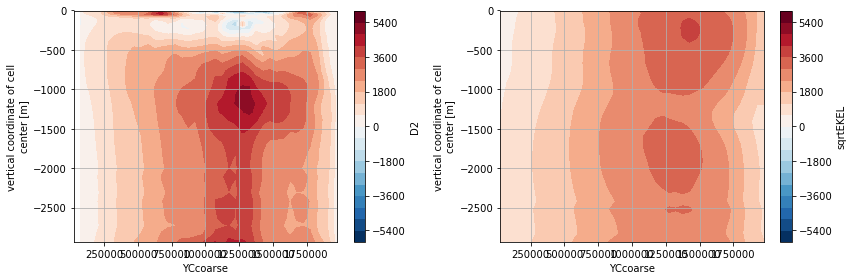

In [148]:
levels = np.linspace(-6000, 6000,21)

plt.figure(figsize=(12,4))

plt.subplot(121)
D2.mean('XCcoarse').plot.contourf(levels=levels, cmap='RdBu_r')
plt.grid()

plt.subplot(122)
(0.36*sqrtEKEL).mean('XCcoarse').plot.contourf(levels=levels, cmap='RdBu_r')
plt.grid()

plt.tight_layout()

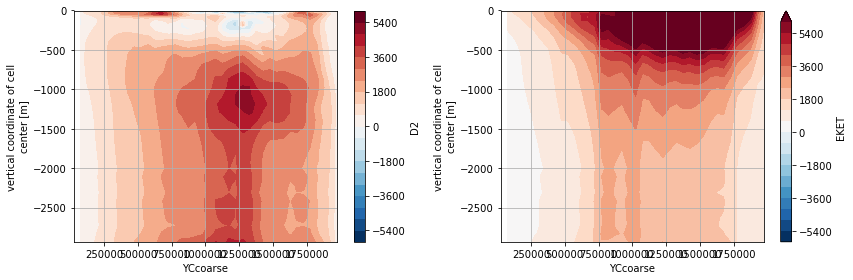

In [163]:
levels = np.linspace(-6000, 6000,21)

plt.figure(figsize=(12,4))

plt.subplot(121)
D2.mean('XCcoarse').plot.contourf(levels=levels, cmap='RdBu_r')
plt.grid()

plt.subplot(122)
(0.036*EKETscale*24*3600).mean('XCcoarse').plot.contourf(levels=levels, cmap='RdBu_r')
plt.grid()

plt.tight_layout()

In [99]:
sqrtEKELbins = np.linspace(0, 17500, 101)

In [106]:
h_sqrtEKEL_vs_D2 = histogram(sqrtEKEL.sel(YCcoarse=slice(0,1700e3)), 
                             D2.sel(YCcoarse=slice(0,1700e3)), bins=[sqrtEKELbins, D2bins])

In [117]:
h_sqrtEKEL_vs_D2

<xarray.DataArray 'histogram_sqrtEKEL_D2' (sqrtEKEL_bin: 100, D2_bin: 100)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])
Coordinates:
  * sqrtEKEL_bin  (sqrtEKEL_bin) float64 87.5 262.5 ... 1.724e+04 1.741e+04
  * D2_bin        (D2_bin) float64 -1.485e+04 -1.455e+04 ... 1.455e+04 1.485e+04

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/computation.py:603: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


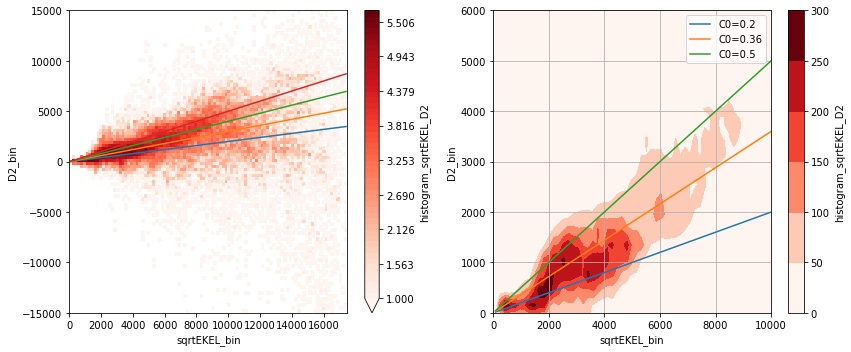

In [279]:
plt.figure(figsize=(12,5))

plt.subplot(121)
np.log(h_sqrtEKEL_vs_D2.T).plot(vmin=1, levels=51, cmap='Reds')
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.2*h_sqrtEKEL_vs_D2.sqrtEKEL_bin)
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.3*h_sqrtEKEL_vs_D2.sqrtEKEL_bin)
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.4*h_sqrtEKEL_vs_D2.sqrtEKEL_bin)
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.5*h_sqrtEKEL_vs_D2.sqrtEKEL_bin)

plt.subplot(122)
(h_sqrtEKEL_vs_D2.T).plot.contourf(cmap='Reds')
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.2*h_sqrtEKEL_vs_D2.sqrtEKEL_bin, label='C0=0.2')
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.36*h_sqrtEKEL_vs_D2.sqrtEKEL_bin, label='C0=0.36')
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.5*h_sqrtEKEL_vs_D2.sqrtEKEL_bin, label='C0=0.5')

plt.legend()
plt.xlim([0,10e3])
plt.ylim([0,6e3])
plt.grid()

plt.tight_layout()


In [294]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

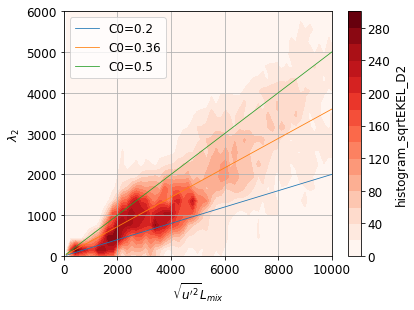

In [298]:
plt.figure(figsize=(6,4.5))
(h_sqrtEKEL_vs_D2.T).plot.contourf(cmap='Reds', levels=20)
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.2*h_sqrtEKEL_vs_D2.sqrtEKEL_bin, label='C0=0.2', Linewidth=0.8)
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.36*h_sqrtEKEL_vs_D2.sqrtEKEL_bin, label='C0=0.36', Linewidth=0.8)
plt.plot(h_sqrtEKEL_vs_D2.sqrtEKEL_bin, 0.5*h_sqrtEKEL_vs_D2.sqrtEKEL_bin, label='C0=0.5', Linewidth=0.8)

plt.xlabel(r'$\sqrt{u^{\prime2}} L_{mix}$')
plt.ylabel(r'$\lambda_2$')

plt.legend()
plt.xlim([0,10e3])
plt.ylim([0,6e3])
plt.grid()

plt.savefig('mixing_length.eps')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


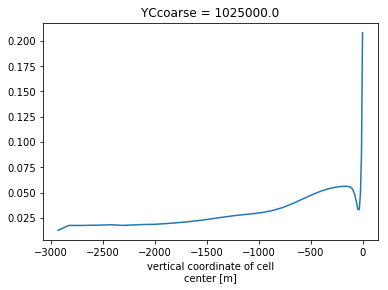

In [212]:
(( Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).mean('XCcoarse').sel(YCcoarse=1000e3,method='nearest').plot()


/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nan

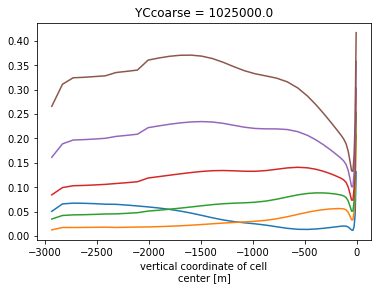

In [209]:
((0.02 - Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).mean('XCcoarse').sel(YCcoarse=1000e3,method='nearest').plot()

((-0.0 - Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).mean('XCcoarse').sel(YCcoarse=1000e3,method='nearest').plot()
((-0.01 - Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).mean('XCcoarse').sel(YCcoarse=1000e3,method='nearest').plot()
((-0.02 - Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).mean('XCcoarse').sel(YCcoarse=1000e3,method='nearest').plot()
((-0.03 - Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).mean('XCcoarse').sel(YCcoarse=1000e3,method='nearest').plot()
((-0.04- Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).mean('XCcoarse').sel(YCcoarse=1000e3,method='nearest').plot()

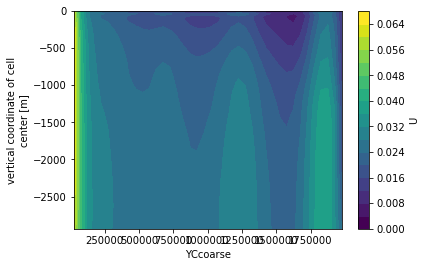

In [181]:
((Vels_coarse.U - 0.17)**2).mean('XCcoarse').plot.contourf(levels=21)

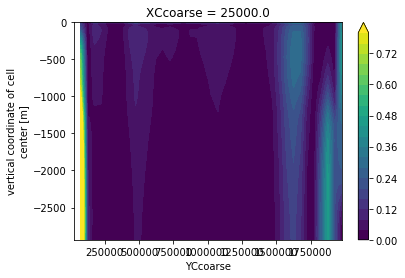

In [271]:
((Vels_coarse.U)**2/EKE).where(EKE.hFacCcoarse==1).sel(XCcoarse=0, method='nearest').plot.contourf(levels=21, vmax=0.8)

In [216]:
shear = Vels_coarse['Shear']**0.5

In [258]:
binshear = np.logspace(-8, -4, 41)

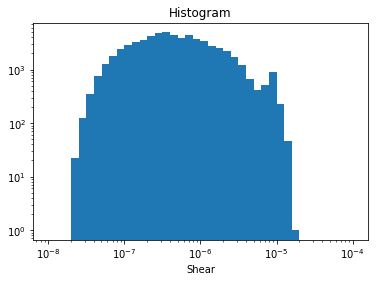

In [259]:
[_,_,_] = shear.plot.hist(bins=binshear)
plt.yscale('log')
plt.xscale('log')

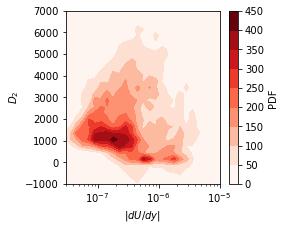

In [260]:
plt.figure(figsize=(4,3.3))

h = histogram((D2).where(EKE.hFacCcoarse==1.).sel(YCcoarse=slice(200e3,1800e3)), 
              shear.sel(YCcoarse=slice(200e3,1800e3)), 
          bins=[D2bins, binshear])
h = h.rename('PDF')

h.plot.contourf(levels=11, cmap='Reds' )

plt.plot(binshear**0.5, 2e-4/binshear**0.5, '--')
plt.ylim([-1000, 7000])
plt.xlim([3e-8, 1e-5])

plt.xscale('log')
plt.ylabel('$D_2$')
plt.xlabel('$|dU/dy|$')
plt.tight_layout()

In [261]:
D2byEKE = (D2/EKE).rename('D2byEKE')

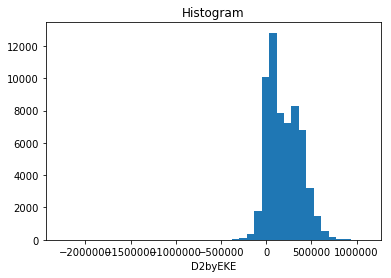

In [262]:
[_,_,_] = D2byEKE.plot.hist(bins=41)

In [263]:
D2byEKEbins = np.linspace(-5e5, 5e5, 41)

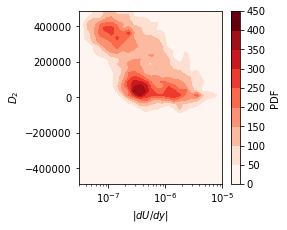

In [264]:
plt.figure(figsize=(4,3.3))

h = histogram(D2byEKE.where(EKE.hFacCcoarse==1.).sel(YCcoarse=slice(200e3,1800e3)), 
              shear.sel(YCcoarse=slice(200e3,1800e3)), 
          bins=[D2byEKEbins, binshear])
h = h.rename('PDF')

h.plot.contourf(levels=11, cmap='Reds' )

plt.plot(binshear**0.5, 2e-4/binshear**0.5, '--')
#plt.ylim([-1000, 7000])
plt.xlim([3e-8, 1e-5])

plt.xscale('log')
plt.ylabel('$D_2$')
plt.xlabel('$|dU/dy|$')
plt.tight_layout()

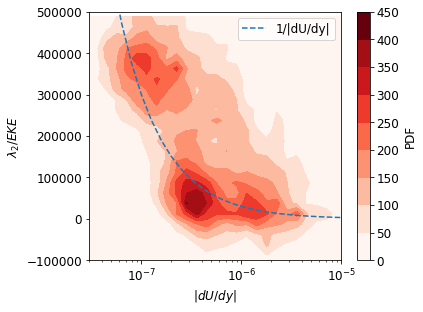

In [306]:
plt.figure(figsize=(6,4.5))

h = histogram(D2byEKE.where(EKE.hFacCcoarse==1.).sel(YCcoarse=slice(200e3,1800e3)), 
              shear.sel(YCcoarse=slice(200e3,1800e3)), 
          bins=[D2byEKEbins, binshear])
h = h.rename('PDF')

h.plot.contourf(levels=11, cmap='Reds' )

plt.plot(binshear, 3e-2/binshear, '--', label='1/|dU/dy|')
#plt.plot(binshear, 3e-2/binshear, '--')
#plt.plot(binshear, 2e-2/binshear, '--')

plt.ylim([-1e5, 5e5])
plt.xlim([3e-8, 1e-5])

plt.xscale('log')
plt.ylabel(r'$\lambda_2/EKE$')
plt.xlabel('$|dU/dy|$')
plt.tight_layout()
plt.legend()
plt.savefig('mixing_length_shear.eps')

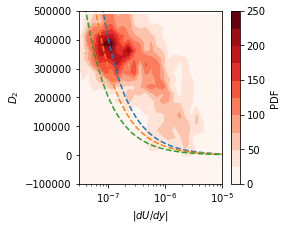

In [276]:
plt.figure(figsize=(4,3.3))

h = histogram(D2byEKE.where(EKE.hFacCcoarse==1.).sel(Z=slice(-1000,-3000), YCcoarse=slice(200e3,1800e3)), 
              shear.sel(Z=slice(-1000,-3000), YCcoarse=slice(200e3,1800e3)), 
          bins=[D2byEKEbins, binshear])
h = h.rename('PDF')

h.plot.contourf(levels=11, cmap='Reds' )

plt.plot(binshear, 4e-2/binshear, '--')
plt.plot(binshear, 3e-2/binshear, '--')
plt.plot(binshear, 2e-2/binshear, '--')

plt.ylim([-1e5, 5e5])
plt.xlim([3e-8, 1e-5])

plt.xscale('log')
plt.ylabel('$D_2$')
plt.xlabel('$|dU/dy|$')
plt.tight_layout()

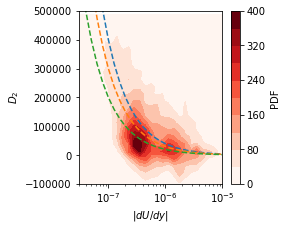

In [278]:
plt.figure(figsize=(4,3.3))

h = histogram(D2byEKE.where(EKE.hFacCcoarse==1.).sel(Z=slice(0,-1000), YCcoarse=slice(200e3,1800e3)), 
              shear.sel(Z=slice(0,-1000), YCcoarse=slice(200e3,1800e3)), 
          bins=[D2byEKEbins, binshear])
h = h.rename('PDF')

h.plot.contourf(levels=11, cmap='Reds' )

plt.plot(binshear, 4e-2/binshear, '--')
plt.plot(binshear, 3e-2/binshear, '--')
plt.plot(binshear, 2e-2/binshear, '--')

plt.ylim([-1e5, 5e5])
plt.xlim([3e-8, 1e-5])

plt.xscale('log')
plt.ylabel('$D_2$')
plt.xlabel('$|dU/dy|$')
plt.tight_layout()

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


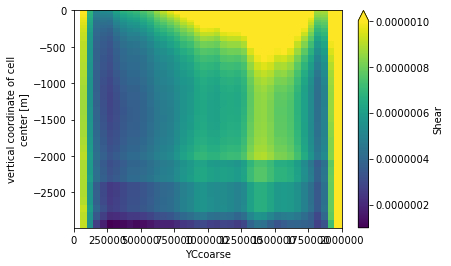

In [270]:
shear.where(EKE.hFacCcoarse==1).mean('XCcoarse').plot(vmax=1e-6)